In [1]:
!pip install pandas numpy scikit-learn xgboost matplotlib seaborn openpyxl


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score
import xgboost as xgb
import seaborn as sns; sns.set()
import pandas as pd


In [4]:
df=pd.read_csv("Crop_recommendation.csv")

In [5]:
print(df.describe())
df.info()

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  
<class 'pandas.core.frame.D

In [6]:
training_set, test_set = train_test_split(df, test_size = 0.25, random_state = 1)

In [7]:
X_train = training_set.iloc[:,:7].values
Y_train = training_set.iloc[:,7].values
X_test = test_set.iloc[:,:7].values
Y_test = test_set.iloc[:,7].values

In [8]:
X_train


array([[ 90.        ,  44.        ,  38.        , ...,  83.88387074,
          7.47313438, 241.2013513 ],
       [ 17.        ,  73.        ,  18.        , ...,  34.51086611,
          5.63235311, 197.3752649 ],
       [ 24.        ,  53.        ,  17.        , ...,  89.07866095,
          6.42127118,  57.65901369],
       ...,
       [ 92.        ,  81.        ,  52.        , ...,  76.52808057,
          5.8914139 , 103.7040783 ],
       [ 28.        ,  58.        ,  81.        , ...,  16.54314829,
          6.18042747,  93.35034262],
       [ 95.        ,  74.        ,  50.        , ...,  80.47152737,
          6.0024816 , 110.10323   ]])

[[24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 37  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  1  0  0 27  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

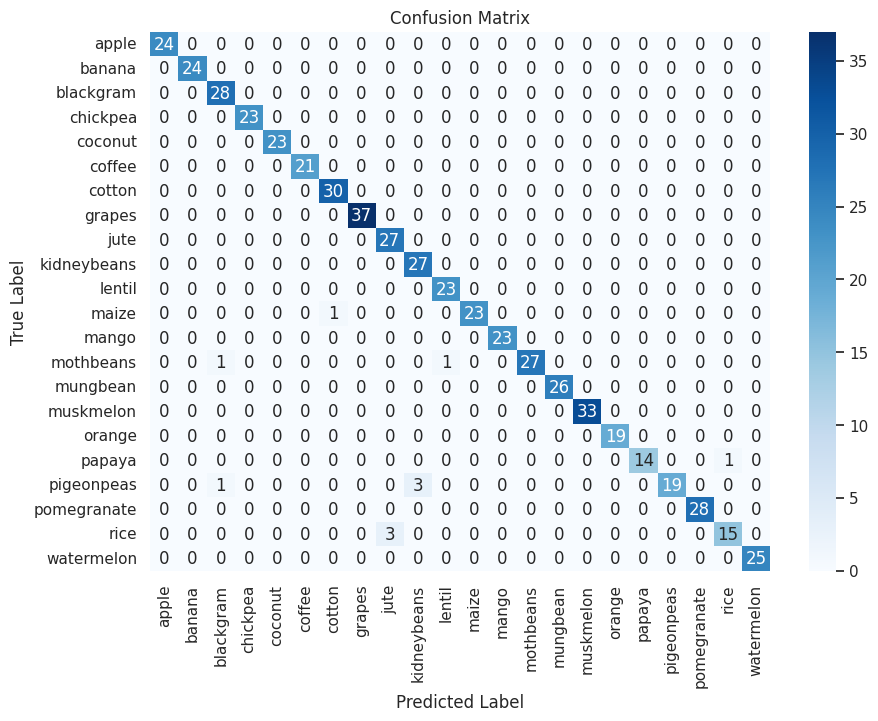

In [10]:
cl1 = SVC(kernel='rbf', class_weight="balanced", C=1.0, random_state=1)
MySVC = cl1.fit(X_train, Y_train)
Y_pred = MySVC.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy = accuracy_score(Y_test, Y_pred)
print("accuracy score: ",accuracy)
precision = precision_score(Y_test, Y_pred, average='weighted', zero_division=0)
print('precision score: ',precision)
recall = recall_score(Y_test, Y_pred, average='weighted', zero_division=0)
print('recall: ',recall)
plt.figure(figsize=(10, 7))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=np.unique(Y_test),
    yticklabels=np.unique(Y_test)
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()





[[24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 37  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

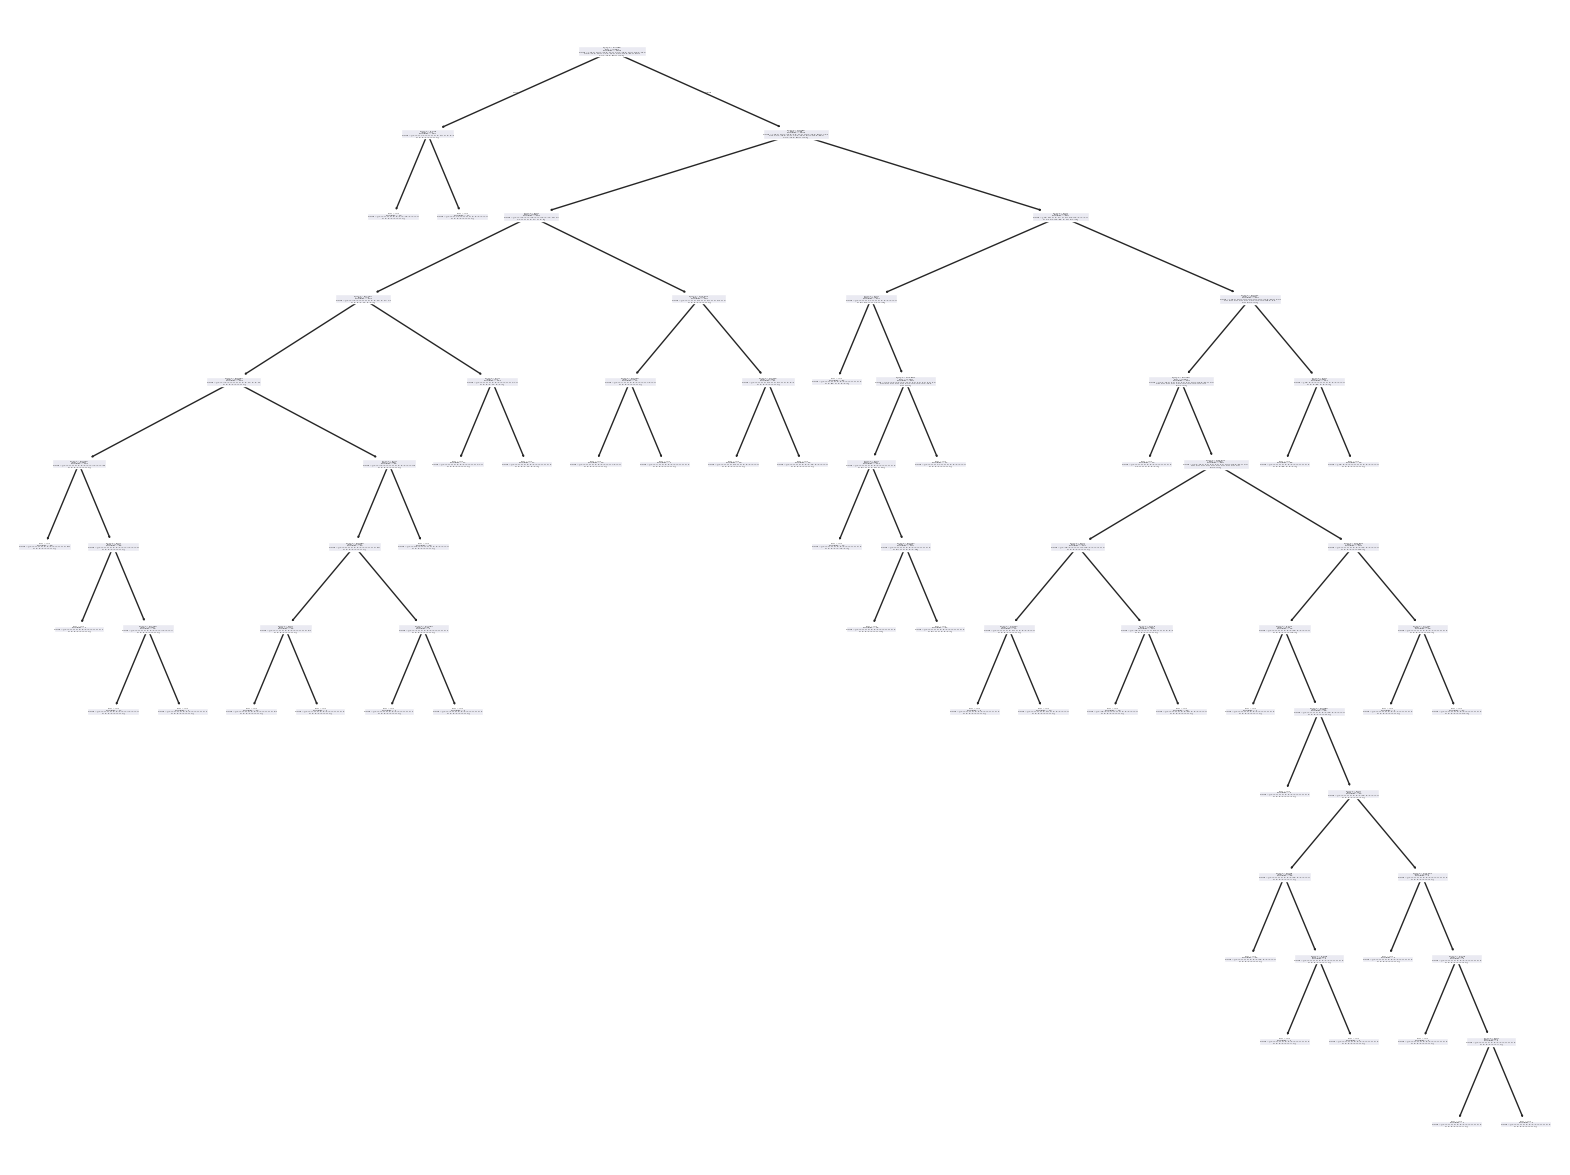

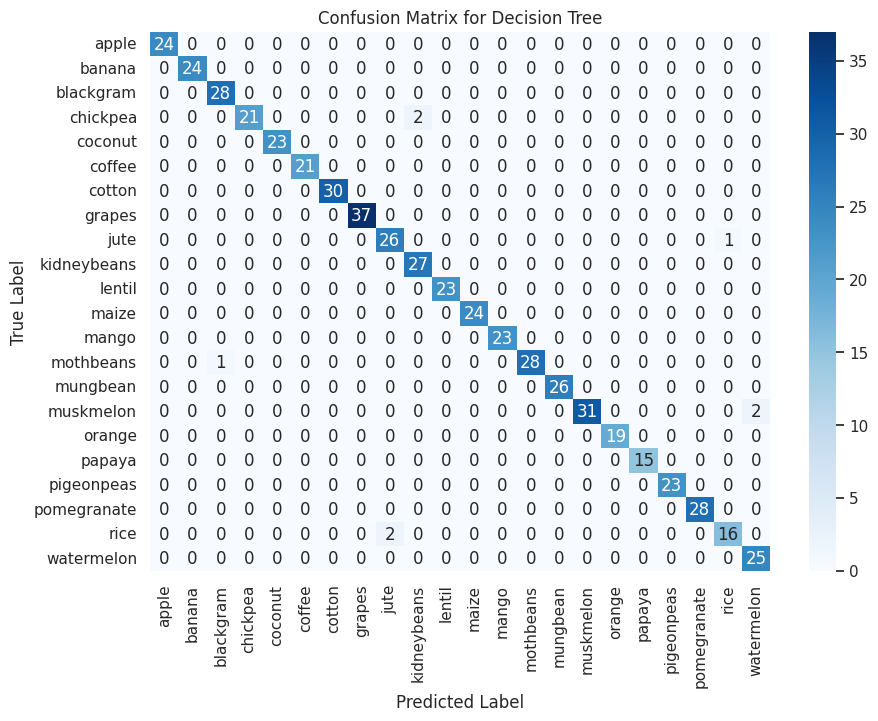

In [11]:
DTV = tree.DecisionTreeClassifier()
DTC = DTV.fit(X_train, Y_train)
plt.figure(figsize=(20, 15))
tree.plot_tree(DTC)
Y_predDTC = DTC.predict(X_test)
cm_dtc = confusion_matrix(Y_test, Y_predDTC)
print(cm_dtc)
accuracy_dtc = accuracy_score(Y_test, Y_predDTC)
print(accuracy_dtc)
precision_dtc = precision_score(Y_test, Y_predDTC, average='weighted', zero_division=0)
print(precision_dtc)
recall_dtc = recall_score(Y_test, Y_predDTC, average='weighted', zero_division=0)
print(recall_dtc)
plt.figure(figsize=(10, 7))
sns.heatmap(
    cm_dtc,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=np.unique(Y_test),
    yticklabels=np.unique(Y_test)
)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='softmax'),
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(Y_train)

In [16]:
mod = model.fit(X_train,y_train_encoded, epochs=50, batch_size=64)
print(mod)


Epoch 1/50


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 7), dtype=float32). Expected shape (None, 28, 28), but input has incompatible shape (None, 7)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 7), dtype=float32)
  • training=True
  • mask=None